# NSE Stock Market Prediction Using Deep-Learning Models paper

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# load tatamotors market data as train dataset

In [3]:
df1= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-1996-to-31-12-1997.csv')

In [4]:
df2= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-1998-to-31-12-1999.csv')

In [5]:
df3= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2000-to-31-12-2001.csv')

In [6]:
df4= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2002-to-31-12-2003.csv')

In [7]:
df5= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2004-to-31-12-2005.csv')

In [8]:
df6= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2006-to-31-12-2007.csv')

In [9]:
df7= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2008-to-31-12-2009.csv')

In [10]:
df8= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2010-to-31-12-2011.csv')

In [11]:
df9= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2012-to-31-12-2013.csv')

In [12]:
df10= pd.read_csv('Quote-Equity-TATAMOTORS-EQ-01-01-2014-to-31-12-2015.csv')

In [13]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]

In [14]:
result = pd.concat(frames)

In [15]:
result.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [16]:
# convert date column to datetime type and sort the rows by date(ascending)

In [18]:
result['Date '] = pd.to_datetime(result['Date '], errors='coerce')

In [19]:
result = result.sort_values(by='Date ')

In [22]:
#extract close column as we just need it, then clean it and convert it to float type

In [23]:
df=result[['close ']]

In [24]:
df.replace(',','', regex=True, inplace=True)

In [125]:
df['close '] = df['close '].astype(float)

In [26]:
# standardize the close column in (0,1) range

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
# splite data to train and test data 

# use stacked LSTM as prediction model

In [28]:
training_size=int(len(df)*0.65)
test_size= len(df)-training_size
train_data,test_data= df[0:training_size,:],df[training_size:len(df1),:1]

In [36]:
# create timesteps in a size of 200 

In [30]:
def create_dataset(dataset, timestep=1):
    dataX,dataY=[],[]
    for i in range (len(dataset)-timestep-1):
        a = dataset[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX),np.array(dataY)

In [31]:
timestep=200
xtrain,ytrain=create_dataset(train_data,timestep)
xtest,ytest=create_dataset(test_data,timestep)

In [ ]:
#reshape input to be [samples, timesteps, features] which is required for LSTM

In [37]:
xtrain=xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest=xtest.reshape(xtest.shape[0], xtrain.shape[1], 1)

In [38]:
xtrain.shape

(3039, 200, 1)

In [40]:
# call necessary libraries to work with neural nerworks

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
#stacked univariate LSTM with 3 hidden layer
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(200,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [137]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
# fit train data to model, mean squre error is reported for each epoch

In [62]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=500,batch_size=64,verbose=1)

Epoch 1/500
48/48 [==============================] - 65s 616ms/step - loss: 0.0229
Epoch 2/500
48/48 [==============================] - 25s 508ms/step - loss: 6.1182e-04
Epoch 3/500
48/48 [==============================] - 24s 502ms/step - loss: 5.8861e-04
Epoch 4/500
48/48 [==============================] - 22s 466ms/step - loss: 5.2676e-04
Epoch 5/500
48/48 [==============================] - 24s 509ms/step - loss: 5.5708e-04
Epoch 6/500
48/48 [==============================] - 23s 469ms/step - loss: 5.2287e-04
Epoch 7/500
48/48 [==============================] - 23s 472ms/step - loss: 4.3606e-04
Epoch 8/500
48/48 [==============================] - 23s 480ms/step - loss: 3.9241e-04
Epoch 9/500
48/48 [==============================] - 22s 467ms/step - loss: 3.7671e-04
Epoch 10/500
48/48 [==============================] - 22s 465ms/step - loss: 3.6390e-04
Epoch 11/500
48/48 [==============================] - 23s 473ms/step - loss: 3.5839e-04
Epoch 12/500
48/48 [=========================

48/48 [==============================] - 22s 450ms/step - loss: 9.6408e-05
Epoch 95/500
48/48 [==============================] - 22s 451ms/step - loss: 8.1389e-05
Epoch 96/500
48/48 [==============================] - 22s 449ms/step - loss: 7.6311e-05
Epoch 97/500
48/48 [==============================] - 21s 448ms/step - loss: 8.3296e-05
Epoch 98/500
48/48 [==============================] - 22s 449ms/step - loss: 8.0507e-05
Epoch 99/500
48/48 [==============================] - 22s 455ms/step - loss: 7.9312e-05
Epoch 100/500
48/48 [==============================] - 22s 451ms/step - loss: 9.2058e-05
Epoch 101/500
48/48 [==============================] - 22s 448ms/step - loss: 8.7994e-05
Epoch 102/500
48/48 [==============================] - 22s 449ms/step - loss: 1.0092e-04
Epoch 103/500
48/48 [==============================] - 22s 459ms/step - loss: 8.4917e-05
Epoch 104/500
48/48 [==============================] - 23s 481ms/step - loss: 9.1404e-05
Epoch 105/500
48/48 [===================

48/48 [==============================] - 25s 526ms/step - loss: 7.4124e-05
Epoch 187/500
48/48 [==============================] - 26s 531ms/step - loss: 7.7367e-05
Epoch 188/500
48/48 [==============================] - 25s 517ms/step - loss: 7.8045e-05
Epoch 189/500
48/48 [==============================] - 25s 512ms/step - loss: 7.8183e-05
Epoch 190/500
48/48 [==============================] - 26s 543ms/step - loss: 7.4578e-05
Epoch 191/500
48/48 [==============================] - 24s 503ms/step - loss: 9.1813e-05
Epoch 192/500
48/48 [==============================] - 22s 459ms/step - loss: 7.1874e-05
Epoch 193/500
48/48 [==============================] - 25s 512ms/step - loss: 8.8675e-05
Epoch 194/500
48/48 [==============================] - 23s 485ms/step - loss: 7.7138e-05
Epoch 195/500
48/48 [==============================] - 22s 467ms/step - loss: 7.8367e-05
Epoch 196/500
48/48 [==============================] - 22s 452ms/step - loss: 7.6691e-05
Epoch 197/500
48/48 [==============

48/48 [==============================] - 23s 480ms/step - loss: 7.6906e-05
Epoch 279/500
48/48 [==============================] - 23s 485ms/step - loss: 7.9671e-05
Epoch 280/500
48/48 [==============================] - 23s 482ms/step - loss: 7.5424e-05
Epoch 281/500
48/48 [==============================] - 23s 481ms/step - loss: 7.4312e-05
Epoch 282/500
48/48 [==============================] - 23s 486ms/step - loss: 6.9317e-05
Epoch 283/500
48/48 [==============================] - 23s 484ms/step - loss: 7.2212e-05
Epoch 284/500
48/48 [==============================] - 24s 507ms/step - loss: 7.5518e-05
Epoch 285/500
48/48 [==============================] - 24s 494ms/step - loss: 7.5484e-05
Epoch 286/500
48/48 [==============================] - 23s 483ms/step - loss: 7.2295e-05
Epoch 287/500
48/48 [==============================] - 24s 497ms/step - loss: 7.3671e-05
Epoch 288/500
48/48 [==============================] - 23s 480ms/step - loss: 7.0421e-05
Epoch 289/500
48/48 [==============

48/48 [==============================] - 22s 468ms/step - loss: 7.9105e-05
Epoch 371/500
48/48 [==============================] - 24s 495ms/step - loss: 7.6018e-05
Epoch 372/500
48/48 [==============================] - 23s 486ms/step - loss: 7.4462e-05
Epoch 373/500
48/48 [==============================] - 22s 468ms/step - loss: 8.5053e-05
Epoch 374/500
48/48 [==============================] - 24s 510ms/step - loss: 7.2703e-05
Epoch 375/500
48/48 [==============================] - 23s 487ms/step - loss: 7.5671e-05
Epoch 376/500
48/48 [==============================] - 24s 507ms/step - loss: 8.3121e-05
Epoch 377/500
48/48 [==============================] - 24s 509ms/step - loss: 7.9570e-05
Epoch 378/500
48/48 [==============================] - 22s 459ms/step - loss: 7.5923e-05
Epoch 379/500
48/48 [==============================] - 22s 453ms/step - loss: 8.0621e-05
Epoch 380/500
48/48 [==============================] - 22s 452ms/step - loss: 8.5078e-05
Epoch 381/500
48/48 [==============

48/48 [==============================] - 23s 481ms/step - loss: 7.5284e-05
Epoch 463/500
48/48 [==============================] - 25s 519ms/step - loss: 7.6317e-05
Epoch 464/500
48/48 [==============================] - 22s 465ms/step - loss: 7.5641e-05
Epoch 465/500
48/48 [==============================] - 25s 513ms/step - loss: 7.0042e-05
Epoch 466/500
48/48 [==============================] - 25s 523ms/step - loss: 6.8986e-05
Epoch 467/500
48/48 [==============================] - 26s 538ms/step - loss: 7.2804e-05
Epoch 468/500
48/48 [==============================] - 25s 515ms/step - loss: 7.2518e-05
Epoch 469/500
48/48 [==============================] - 24s 496ms/step - loss: 7.8962e-05
Epoch 470/500
48/48 [==============================] - 25s 521ms/step - loss: 7.3394e-05
Epoch 471/500
48/48 [==============================] - 24s 509ms/step - loss: 7.7844e-05
Epoch 472/500
48/48 [==============================] - 25s 528ms/step - loss: 7.3473e-05
Epoch 473/500
48/48 [==============

In [63]:
# loas test data

In [44]:
testdf1= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2017-to-31-12-2017.csv')

In [45]:
testdf2= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2015-to-31-12-2016.csv')

In [46]:
testdf3= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2013-to-31-12-2014.csv')

In [47]:
testdf4= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2011-to-31-12-2012.csv')

In [48]:
testdf5= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2009-to-31-12-2010.csv')

In [49]:
testdf6= pd.read_csv('Quote-Equity-MARUTI-EQ-01-01-2007-to-31-12-2008.csv')

In [50]:
testframes = [testdf1,testdf2,testdf3,testdf4,testdf5, testdf6]

In [51]:
testresult = pd.concat(testframes)

In [52]:
testresult.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [53]:
testresult['Date '] = pd.to_datetime(testresult['Date '], errors='coerce')

In [54]:
testresult = testresult.sort_values(by='Date ')

In [55]:
tdf=testresult[['close ']]

In [56]:
tdf.replace(',','', regex=True, inplace=True)

In [57]:
tdf['close '] = tdf['close '].astype(float)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tdf=scaler.fit_transform(np.array(tdf).reshape(-1,1))

In [60]:
timestep=200
testx,testy=create_dataset(tdf,timestep)

In [61]:
testx=testx.reshape(testx.shape[0], testx.shape[1], 1)

In [64]:
predict=model.predict(testx)

In [74]:
testy = testy.reshape(2524,1)

In [ ]:
# measure the MAPE metric introduced by paper

In [85]:
for i in range(0,len(predict)):
    sum = abs(testy[i][0]-predict[i][0])/abs(testy[i][0])

In [86]:
mape = sum/len(predict)

In [87]:
mape

1.4103774456873564e-05

In [96]:
# plot predicted and actual price 

In [93]:
# return to actual value (destandardization)
predictinv = scaler.inverse_transform(predict) 
testyinv = scaler.inverse_transform(testy)

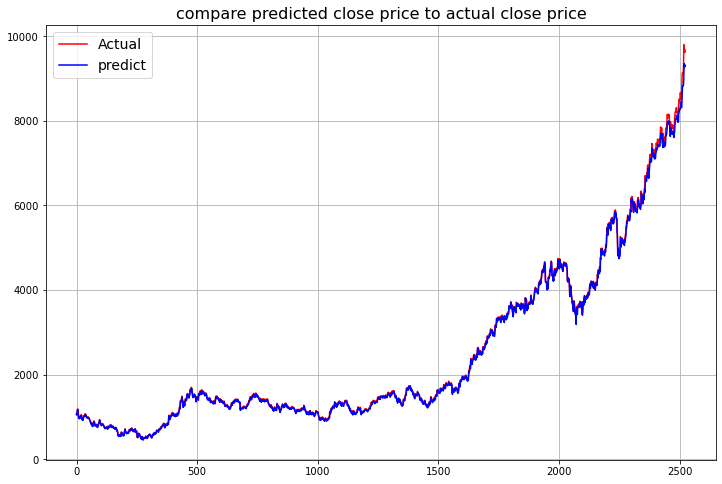

In [181]:
plt.figure(figsize=(12, 8))
plt.plot(testyinv, '-r', label='Actual')
plt.plot(predictinv, '-b', label='predict')
plt.legend(fontsize=14)
plt.title('compare predicted close price to actual close price', fontsize=16)
plt.grid()

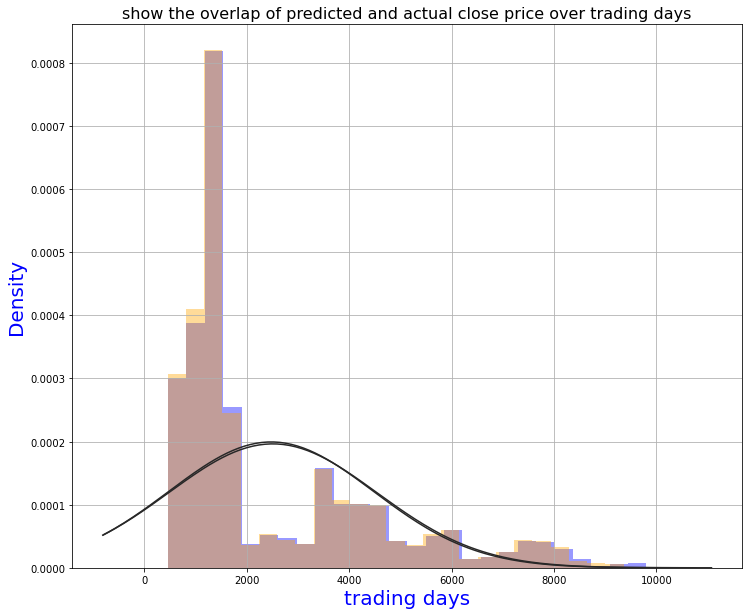

In [183]:
# how histogram of two actual and predicted values are cover each other
from scipy.stats import norm
plt.figure(figsize=(12,10))
sns.distplot(testyinv,fit=norm, kde=False,color='b', label='Actual')
sns.distplot(predictinv,fit=norm, kde=False, color='orange', label='predicted')
plt.xlabel('trading days',fontsize=20,color='b')
plt.ylabel('Density',fontsize=20,color='b')
plt.title('show the overlap of predicted and actual close price over trading days', fontsize=16)
plt.grid()

In [114]:
testyresh = testy.reshape(2524,)

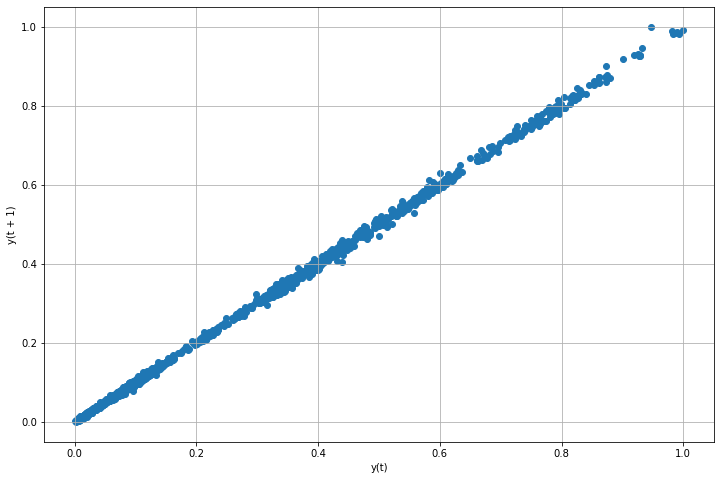

In [118]:
testyseries = pd.Series(testyresh)
plt.figure(figsize=(12,8))
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(testyseries)
plt.grid()
pyplot.show()

# predict 10 future days

In [157]:
len(tdf)

2725

In [158]:
x_input = tdf[2525:].reshape(1,-1)

In [159]:
x_input.shape

(1, 200)

In [160]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [161]:
from numpy import array

out=[]
lst_output = []
n_step = 200
i=0
while(i<10):
    if(len(temp_input)>200):
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_step, 1))
        yhat= model.predict(x_input, verbose=0)
        out.append(yhat)
        print('{} day output {}'.format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_step, 1))
        yhat =model.predict(x_input, verbose=0)
        print(yhat[0])
        out.append(yhat)
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)                    

[0.9530329]
201
1 day input [0.60775571 0.6096933  0.61367018 0.61006262 0.60122036 0.59367339
 0.59677782 0.59355029 0.59153241 0.59029599 0.58707381 0.58840657
 0.59473318 0.60076005 0.62970615 0.6242734  0.62081571 0.62183268
 0.6195793  0.60959161 0.60139699 0.60542204 0.6077343  0.61413585
 0.62233046 0.61294225 0.62713162 0.62914949 0.63654659 0.63309426
 0.64923727 0.66857571 0.66199219 0.66154258 0.66307873 0.66055237
 0.66041856 0.67202805 0.67467751 0.67121983 0.68125033 0.69517208
 0.69562704 0.68201574 0.67768024 0.66816892 0.68713269 0.68614783
 0.69857089 0.70703848 0.71449446 0.71589145 0.72268908 0.71579511
 0.71238024 0.71355778 0.71210191 0.72212171 0.72681047 0.74986351
 0.74010063 0.73745651 0.73768131 0.73353316 0.72835198 0.72678371
 0.72228764 0.72881229 0.73393995 0.72356153 0.71972917 0.72419312
 0.72411818 0.7233956  0.73799711 0.74036825 0.74052882 0.75084836
 0.74643259 0.74618102 0.74902318 0.75112669 0.76085746 0.75975486
 0.75601349 0.75890917 0.76020982 

4 day output [[0.8661788]]
5 day input [0.60122036 0.59367339 0.59677782 0.59355029 0.59153241 0.59029599
 0.58707381 0.58840657 0.59473318 0.60076005 0.62970615 0.6242734
 0.62081571 0.62183268 0.6195793  0.60959161 0.60139699 0.60542204
 0.6077343  0.61413585 0.62233046 0.61294225 0.62713162 0.62914949
 0.63654659 0.63309426 0.64923727 0.66857571 0.66199219 0.66154258
 0.66307873 0.66055237 0.66041856 0.67202805 0.67467751 0.67121983
 0.68125033 0.69517208 0.69562704 0.68201574 0.67768024 0.66816892
 0.68713269 0.68614783 0.69857089 0.70703848 0.71449446 0.71589145
 0.72268908 0.71579511 0.71238024 0.71355778 0.71210191 0.72212171
 0.72681047 0.74986351 0.74010063 0.73745651 0.73768131 0.73353316
 0.72835198 0.72678371 0.72228764 0.72881229 0.73393995 0.72356153
 0.71972917 0.72419312 0.72411818 0.7233956  0.73799711 0.74036825
 0.74052882 0.75084836 0.74643259 0.74618102 0.74902318 0.75112669
 0.76085746 0.75975486 0.75601349 0.75890917 0.76020982 0.7526575
 0.75822941 0.75946582 0.

8 day output [[0.8055483]]
9 day input [0.59153241 0.59029599 0.58707381 0.58840657 0.59473318 0.60076005
 0.62970615 0.6242734  0.62081571 0.62183268 0.6195793  0.60959161
 0.60139699 0.60542204 0.6077343  0.61413585 0.62233046 0.61294225
 0.62713162 0.62914949 0.63654659 0.63309426 0.64923727 0.66857571
 0.66199219 0.66154258 0.66307873 0.66055237 0.66041856 0.67202805
 0.67467751 0.67121983 0.68125033 0.69517208 0.69562704 0.68201574
 0.67768024 0.66816892 0.68713269 0.68614783 0.69857089 0.70703848
 0.71449446 0.71589145 0.72268908 0.71579511 0.71238024 0.71355778
 0.71210191 0.72212171 0.72681047 0.74986351 0.74010063 0.73745651
 0.73768131 0.73353316 0.72835198 0.72678371 0.72228764 0.72881229
 0.73393995 0.72356153 0.71972917 0.72419312 0.72411818 0.7233956
 0.73799711 0.74036825 0.74052882 0.75084836 0.74643259 0.74618102
 0.74902318 0.75112669 0.76085746 0.75975486 0.75601349 0.75890917
 0.76020982 0.7526575  0.75822941 0.75946582 0.75414548 0.76061125
 0.76428839 0.76759086 0

In [171]:
out_list = [l.tolist() for l in out]

In [172]:
out_list

[[[0.953032910823822]],
 [[0.926957368850708]],
 [[0.9034659266471863]],
 [[0.8835887908935547]],
 [[0.8661788105964661]],
 [[0.8502811193466187]],
 [[0.8351303935050964]],
 [[0.820273756980896]],
 [[0.8055483102798462]],
 [[0.7909890413284302]]]

In [178]:
# ***suggestion to buy or sell***

In [176]:
def which_order(list1):
    isAscending = True
    isDescending = True
    for i in range(1,len(list1)):
        if(list1[i] >= list1[i-1]):
            isDescending = False
        elif(list1[i] <= list1[i-1]):
            isAscending = False
        if((not isAscending) and (not isDescending)):
            print("The list is not sorted in either order. no suggention! :)")
            break
    if(isAscending):
        print("The price is in ascending order, it's better to 'sell'")
    if(isDescending):
        print("The price is in descending order, it's better to 'buy'")

In [177]:
which_order(out_list)

The price is in descending order, it's better to 'buy'
